In [122]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline 

In [123]:
confirmed_cases = pd.read_csv('time_series_covid-19_confirmed.csv')

In [124]:
deaths_reported = pd.read_csv('time_series_covid-19_deaths.csv')

In [125]:
recovered_cases = pd.read_csv('time_series_covid-19_recovered.csv')

In [126]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [127]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,1,1,1,2,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,4,5,5,6,8,10,10
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,11,15,17,17,19,21,25,26,29,31
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,1,1,1,1,3,3,3,6
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [128]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,0,2,2,2,10,17,17,31,31,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,32,32,65,65,24,65,29,29,31,31
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
confirmed_cases['Country/Region'].value_counts().sort_values()

Congo (Kinshasa)                     1
Bahamas                              1
Senegal                              1
US                                   1
Korea, South                         1
Brunei                               1
Finland                              1
Lithuania                            1
Iran                                 1
Slovakia                             1
Guinea-Bissau                        1
Armenia                              1
Monaco                               1
Romania                              1
Thailand                             1
Turkey                               1
Sri Lanka                            1
Italy                                1
Egypt                                1
Taiwan*                              1
Trinidad and Tobago                  1
Russia                               1
Diamond Princess                     1
Singapore                            1
Venezuela                            1
Eritrea                  

In [130]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20'],
      dtype='object')

In [131]:
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,0,0,0,0,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,0,0,0,0,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,0,0,0,0,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,0,0,0,0,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,0,0,0,0,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [132]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [133]:
confirmed_sum

720117

In [134]:
death_sum

33925

In [135]:
recovered_sum

149082

In [136]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97886,
 101801,
 105847,
 109821,
 113590,
 118620,
 125875,
 128352,
 145205,
 156101,
 167454,
 181574,
 197102,
 214821,
 242500,
 272035,
 304396,
 336953,
 378235,
 418045,
 467653,
 529591,
 593291,
 660706,
 720117]

In [137]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [138]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67]])

In [139]:
world_cases

array([[   555],
       [   654],
       [   941],
       [  1434],
       [  2118],
       [  2927],
       [  5578],
       [  6166],
       [  8234],
       [  9927],
       [ 12038],
       [ 16787],
       [ 19881],
       [ 23892],
       [ 27635],
       [ 30794],
       [ 34391],
       [ 37120],
       [ 40150],
       [ 42762],
       [ 44802],
       [ 45221],
       [ 60368],
       [ 66885],
       [ 69030],
       [ 71224],
       [ 73258],
       [ 75136],
       [ 75639],
       [ 76197],
       [ 76819],
       [ 78572],
       [ 78958],
       [ 79561],
       [ 80406],
       [ 81388],
       [ 82746],
       [ 84112],
       [ 86011],
       [ 88369],
       [ 90306],
       [ 92840],
       [ 95120],
       [ 97886],
       [101801],
       [105847],
       [109821],
       [113590],
       [118620],
       [125875],
       [128352],
       [145205],
       [156101],
       [167454],
       [181574],
       [197102],
       [214821],
       [242500],
       [272035

In [140]:
total_deaths

array([[   17],
       [   18],
       [   26],
       [   42],
       [   56],
       [   82],
       [  131],
       [  133],
       [  171],
       [  213],
       [  259],
       [  362],
       [  426],
       [  492],
       [  564],
       [  634],
       [  719],
       [  806],
       [  906],
       [ 1013],
       [ 1113],
       [ 1118],
       [ 1371],
       [ 1523],
       [ 1666],
       [ 1770],
       [ 1868],
       [ 2007],
       [ 2122],
       [ 2247],
       [ 2251],
       [ 2458],
       [ 2469],
       [ 2629],
       [ 2708],
       [ 2770],
       [ 2814],
       [ 2872],
       [ 2941],
       [ 2996],
       [ 3085],
       [ 3160],
       [ 3254],
       [ 3348],
       [ 3460],
       [ 3558],
       [ 3802],
       [ 3988],
       [ 4262],
       [ 4615],
       [ 4720],
       [ 5404],
       [ 5819],
       [ 6440],
       [ 7126],
       [ 7905],
       [ 8733],
       [ 9867],
       [11299],
       [12973],
       [14651],
       [16505],
       [

In [141]:
total_recovered

array([[    28],
       [    30],
       [    36],
       [    39],
       [    52],
       [    61],
       [   107],
       [   126],
       [   143],
       [   222],
       [   284],
       [   472],
       [   623],
       [   852],
       [  1124],
       [  1487],
       [  2011],
       [  2616],
       [  3244],
       [  3946],
       [  4683],
       [  5150],
       [  6295],
       [  8058],
       [  9395],
       [ 10865],
       [ 12583],
       [ 14352],
       [ 16121],
       [ 18177],
       [ 18890],
       [ 22886],
       [ 23394],
       [ 25227],
       [ 27905],
       [ 30384],
       [ 33277],
       [ 36711],
       [ 39782],
       [ 42716],
       [ 45602],
       [ 48228],
       [ 51170],
       [ 53796],
       [ 55865],
       [ 58358],
       [ 60694],
       [ 62494],
       [ 64404],
       [ 67003],
       [ 68324],
       [ 70251],
       [ 72624],
       [ 76034],
       [ 78088],
       [ 80840],
       [ 83312],
       [ 84975],
       [ 87420

In [142]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

In [143]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [144]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

NameError: name 'future_forcast' is not defined

In [145]:
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [146]:
latest_confirmed

0         120
1         212
2         511
3         334
4           7
5           7
6         745
7         424
8          77
9        1791
10         15
11        656
12        299
13         66
14        769
15        311
16       8788
17        209
18         11
19        499
20         48
21         33
22         94
23      10836
24          6
25          4
26         81
27        323
28       4256
29        126
        ...  
223     19522
224       304
225    140886
226       144
227       119
228       188
229        29
230         7
231         0
232        11
233         9
234         8
235         9
236         1
237         2
238         0
239         8
240         8
241       109
242         2
243        18
244         2
245         1
246         4
247        94
248        10
249         2
250         2
251         4
252         2
Name: 3/29/20, Length: 253, dtype: int64

In [147]:
latest_deaths

0         4
1        10
2        31
3         6
4         2
5         0
6        19
7         3
8         0
9         8
10        0
11        2
12        0
13        0
14        4
15        2
16       86
17        4
18        0
19        4
20        5
21        0
22        0
23      431
24        0
25        0
26        1
27        6
28      136
29        1
       ... 
223    1228
224       1
225    2467
226       2
227       2
228       0
229       0
230       1
231       1
232       0
233       0
234       0
235       1
236       0
237       0
238       0
239       0
240       0
241       1
242       0
243       1
244       0
245       0
246       0
247       1
248       0
249       0
250       0
251       0
252       0
Name: 3/29/20, Length: 253, dtype: int64

In [148]:
latest_recoveries

0         2
1        33
2        31
3         1
4         0
5         0
6        72
7        30
8         2
9         4
10        0
11        8
12        6
13        5
14      191
15       28
16      479
17       15
18        1
19      272
20       15
21        0
22       32
23     1359
24        0
25        0
26        0
27        0
28        8
29        6
       ... 
209       0
210       1
211       1
212       2
213     105
214       0
215       6
216      58
217       2
218       0
219       0
220      14
221       0
222       0
223     135
224       0
225    2665
226       7
227      39
228      25
229       0
230       0
231      18
232       0
233       1
234       0
235       0
236       0
237       0
238       0
Name: 3/29/20, Length: 239, dtype: int64

In [149]:
unique_countries =  list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [150]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [151]:
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 140886 cases
Italy: 97689 cases
China: 82122 cases
Spain: 80110 cases
Germany: 62095 cases
France: 40708 cases
Iran: 38309 cases
United Kingdom: 19780 cases
Switzerland: 14829 cases
Netherlands: 10930 cases
Belgium: 10836 cases
Korea, South: 9583 cases
Turkey: 9217 cases
Austria: 8788 cases
Canada: 6280 cases
Portugal: 5962 cases
Norway: 4284 cases
Brazil: 4256 cases
Israel: 4247 cases
Australia: 3984 cases
Sweden: 3700 cases
Czechia: 2817 cases
Ireland: 2615 cases
Denmark: 2564 cases
Malaysia: 2470 cases
Chile: 2139 cases
Luxembourg: 1950 cases
Ecuador: 1924 cases
Japan: 1866 cases
Poland: 1862 cases
Romania: 1815 cases
Pakistan: 1597 cases
Russia: 1534 cases
Philippines: 1418 cases
Thailand: 1388 cases
Saudi Arabia: 1299 cases
Indonesia: 1285 cases
South Africa: 1280 cases
Finland: 1240 cases
Greece: 1156 cases
India: 1024 cases
Iceland: 1020 cases
Panama: 901 cases
Dominican Republic: 859 cases
Peru: 852 cases
Mexico: 848 cases
Singapore: 84

In [152]:
unique_provinces =  list(confirmed_cases['Province/State'].unique())
# those are countries, which are not provinces/states.
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)

ValueError: list.remove(x): x not in list

In [ ]:
province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
for i in no_cases:
    unique_provinces.remove(i)

In [ ]:
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

In [153]:
nan_indices = [] 


for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

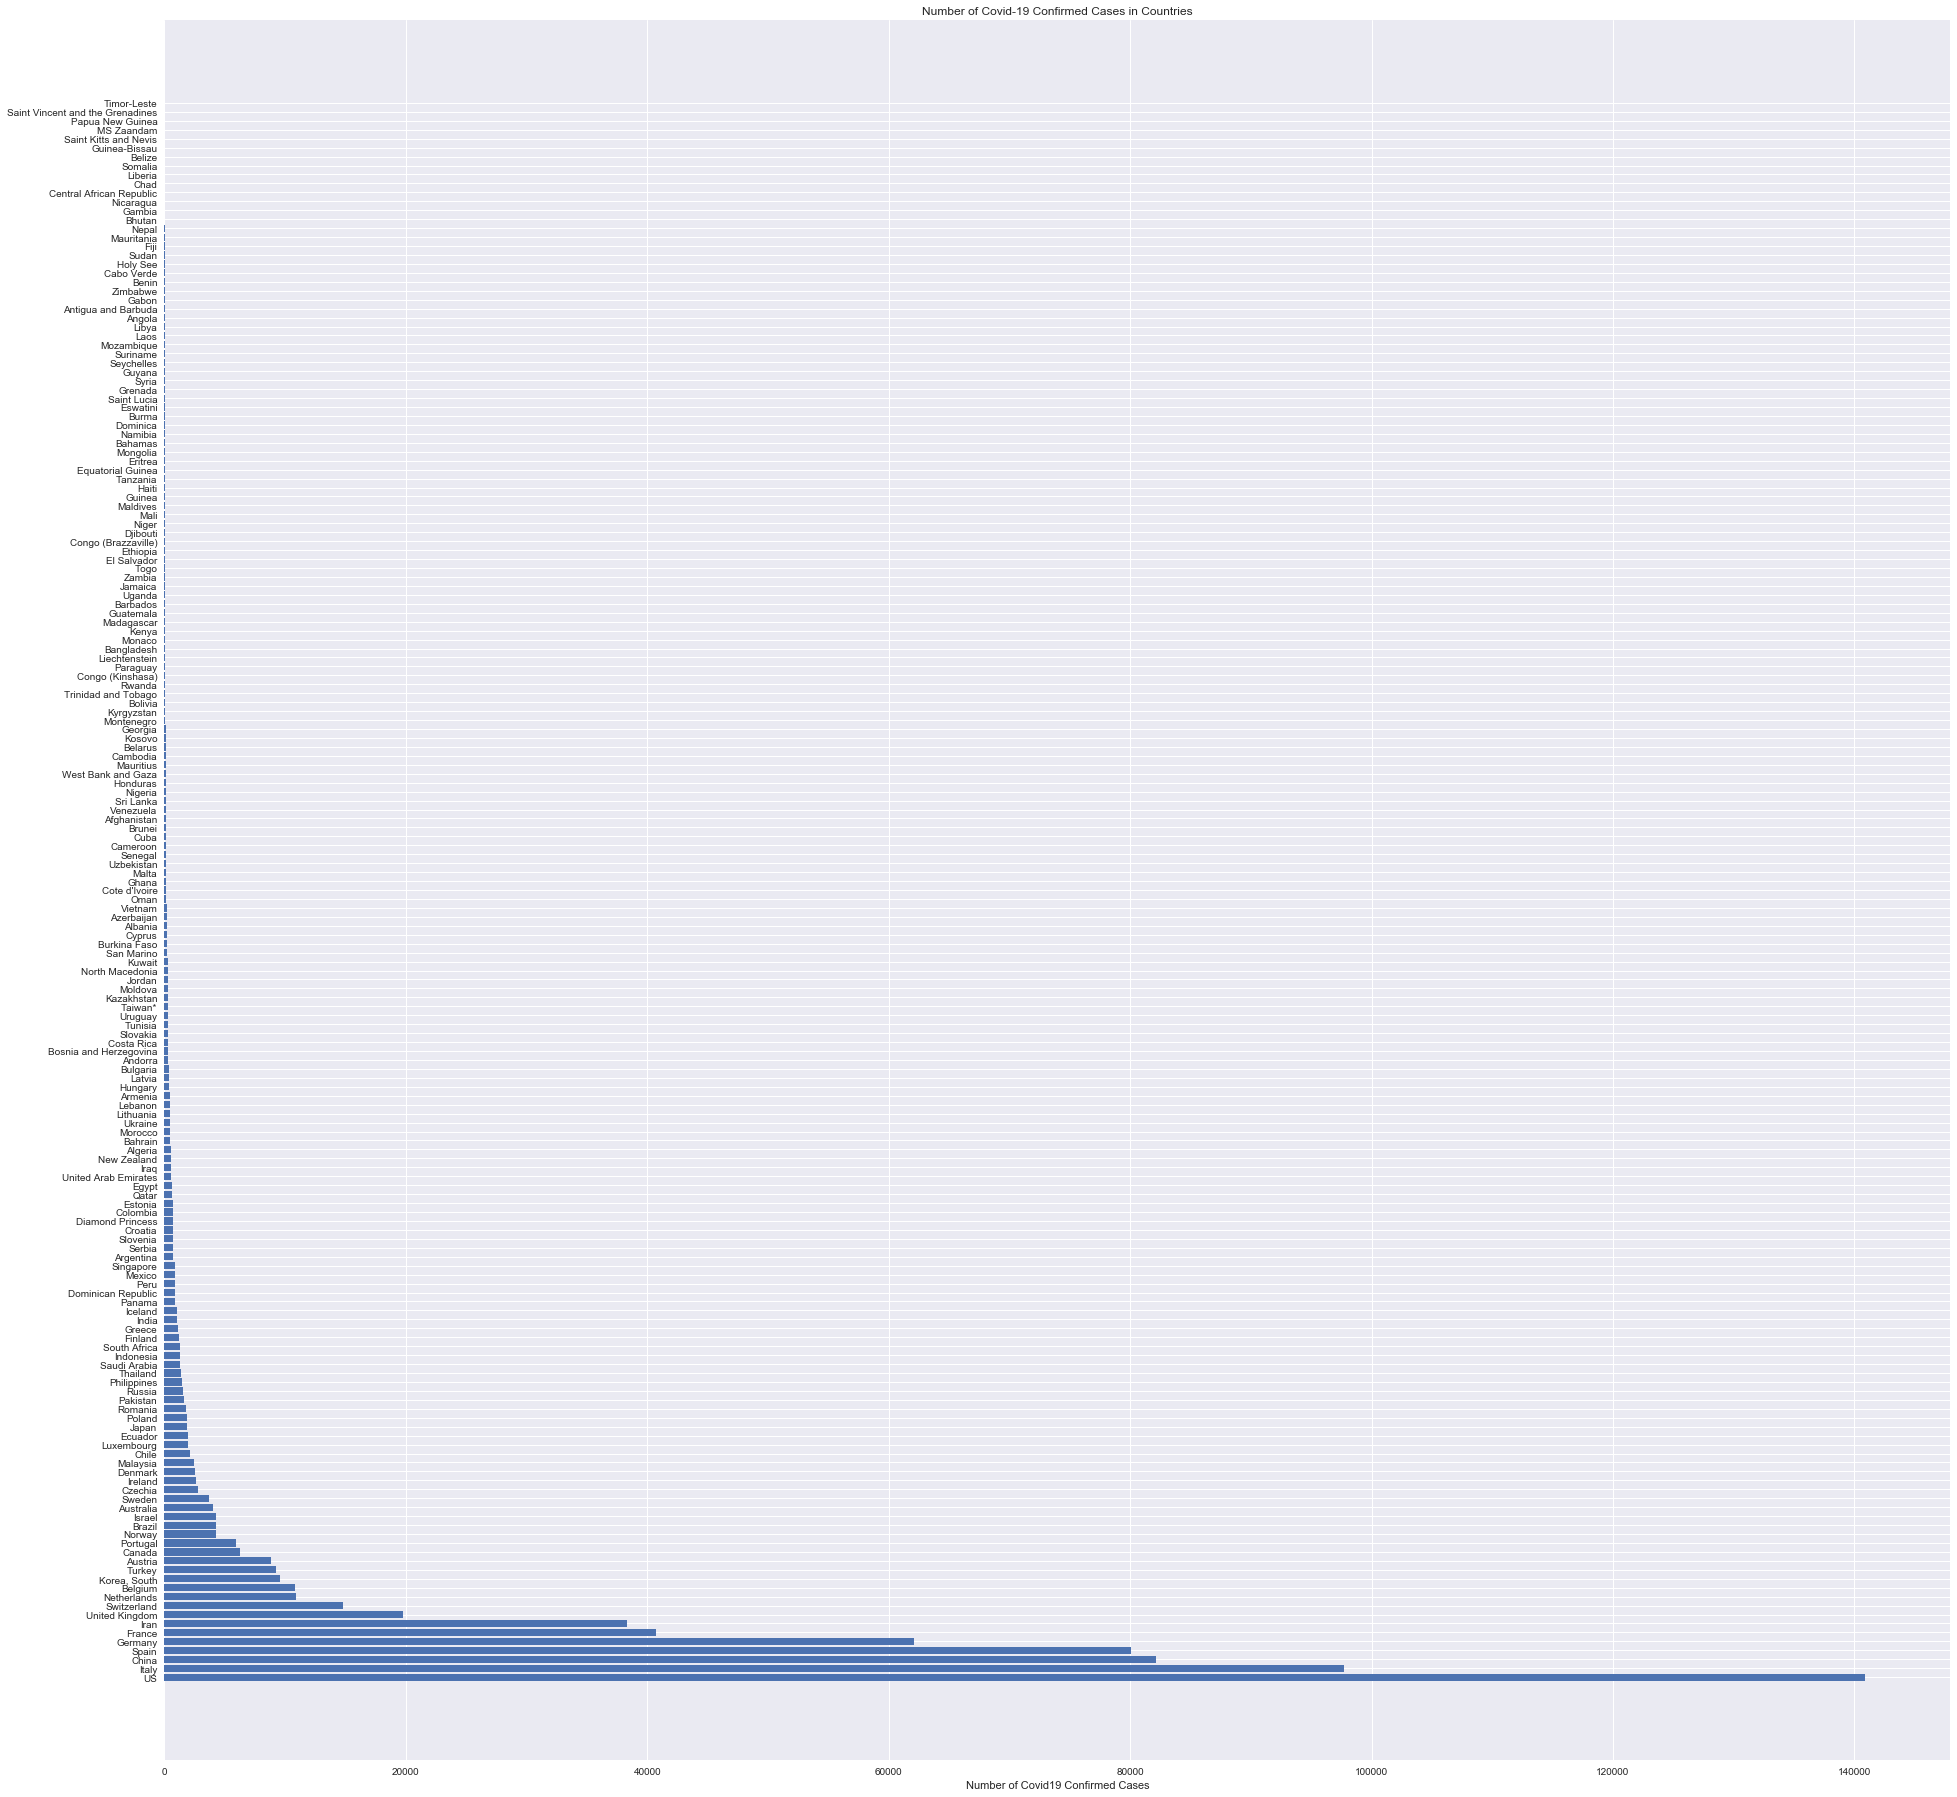

In [154]:
plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

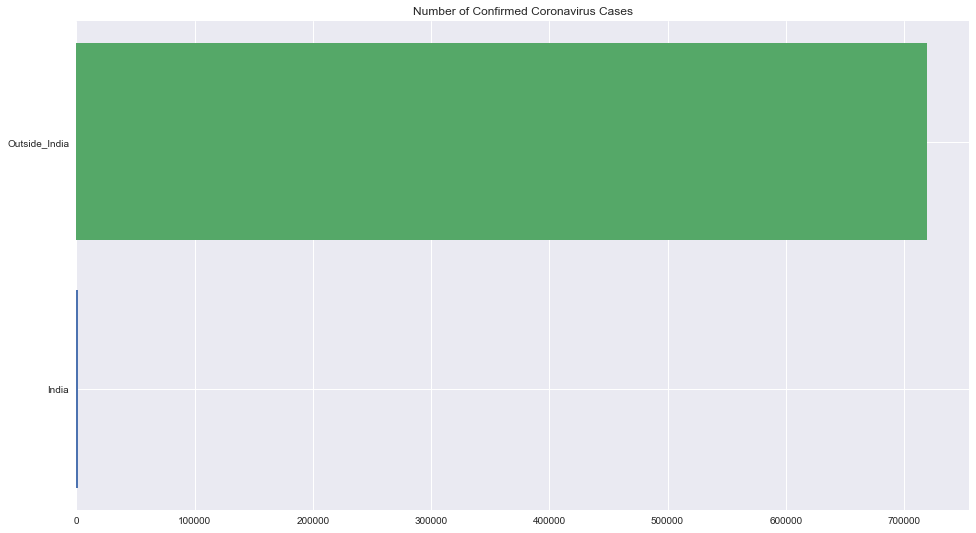

In [155]:
india_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='India'].sum()
outside_india_confirmed = np.sum(country_confirmed_cases) - india_confirmed
plt.figure(figsize=(16, 9))
plt.barh('India', india_confirmed)
plt.barh('Outside_India', outside_india_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.show()

In [156]:
print('Outside India {} cases:'.format(outside_india_confirmed))
print('India: {} cases'.format(india_confirmed))
print('Total: {} cases'.format(india_confirmed+outside_india_confirmed))

Outside India 719093 cases:
India: 1024 cases
Total: 720117 cases


In [157]:
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

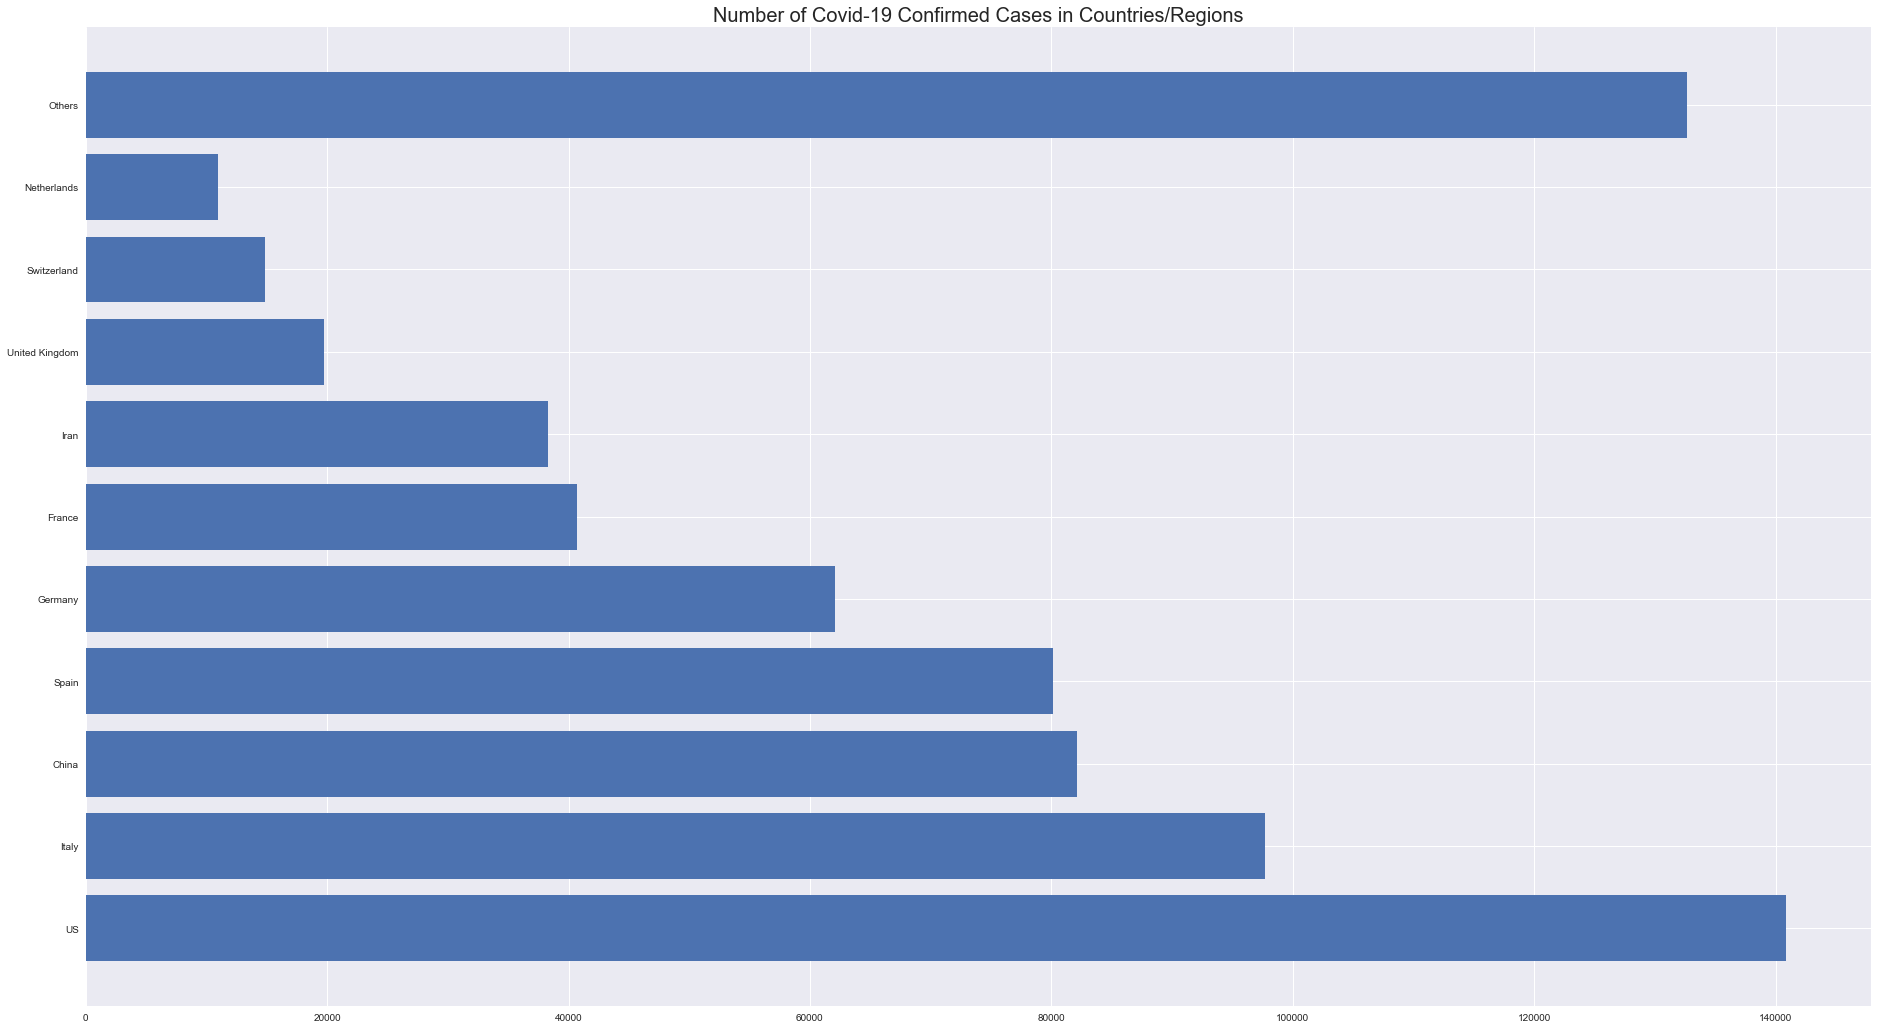

In [158]:
plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

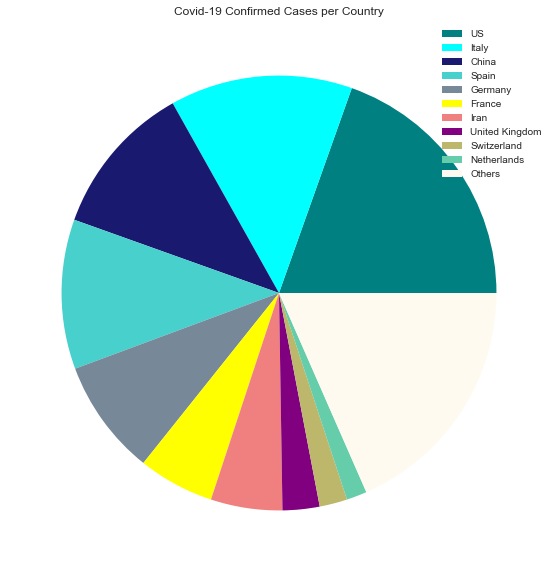

In [159]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(10,10))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

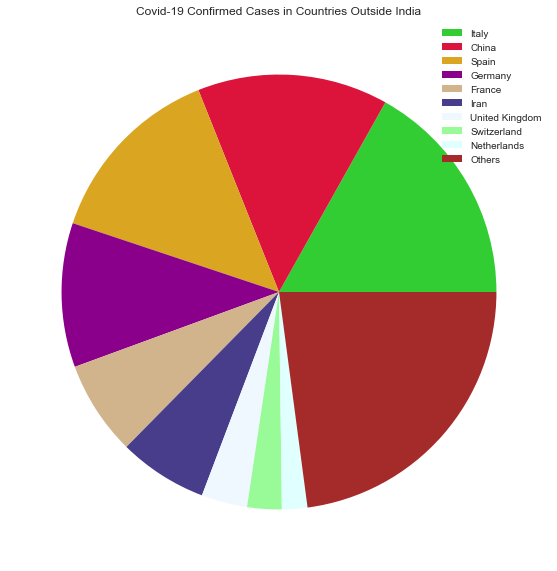

In [160]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(10,10))
plt.title('Covid-19 Confirmed Cases in Countries Outside India')
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best')
plt.show()

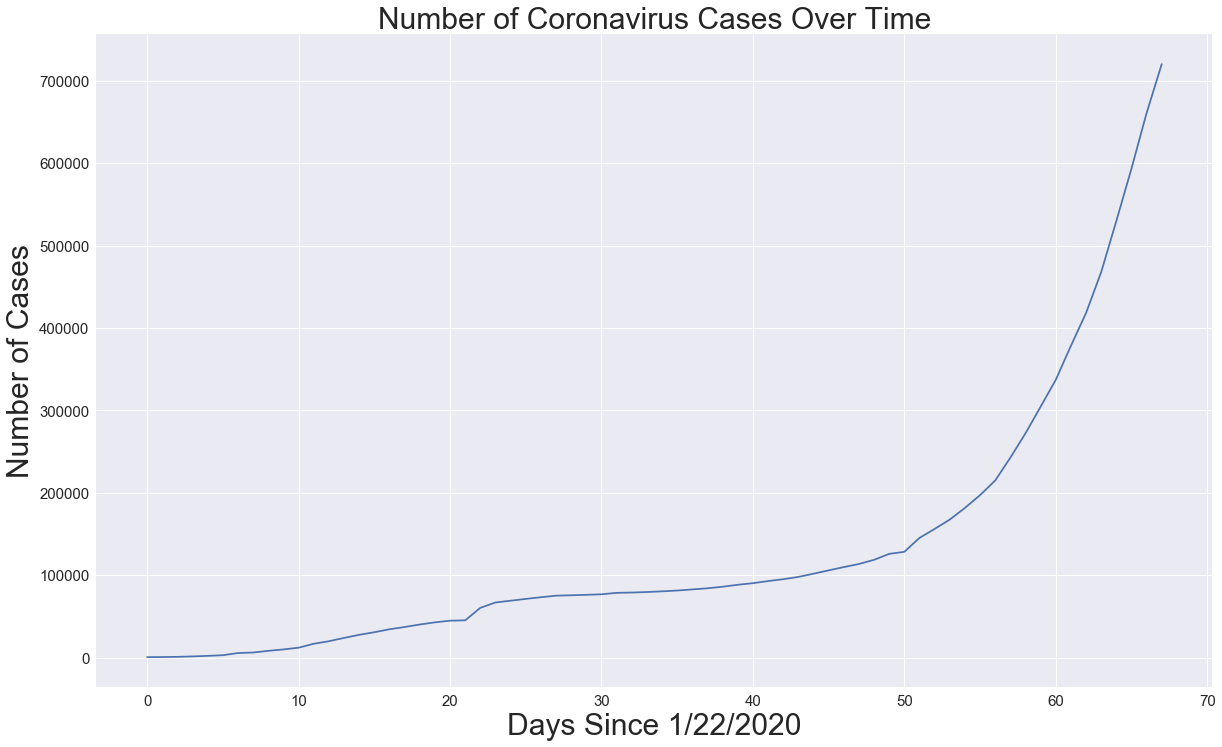

In [162]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

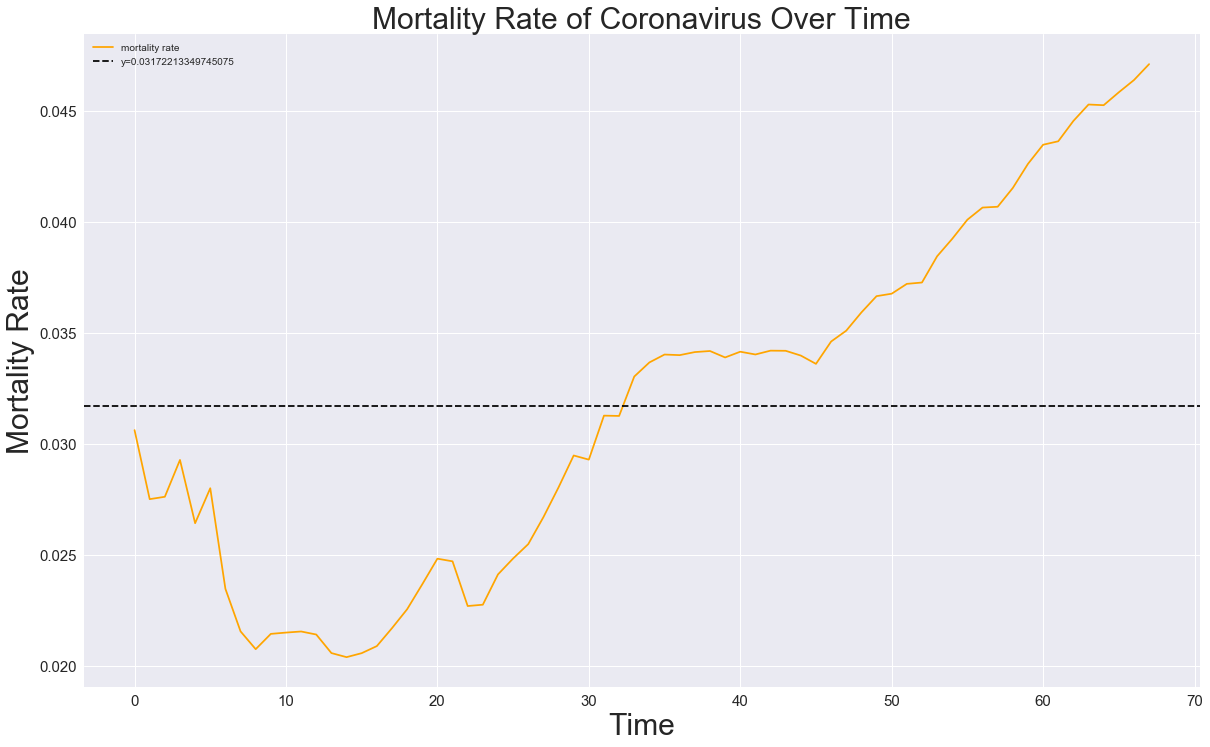

In [163]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

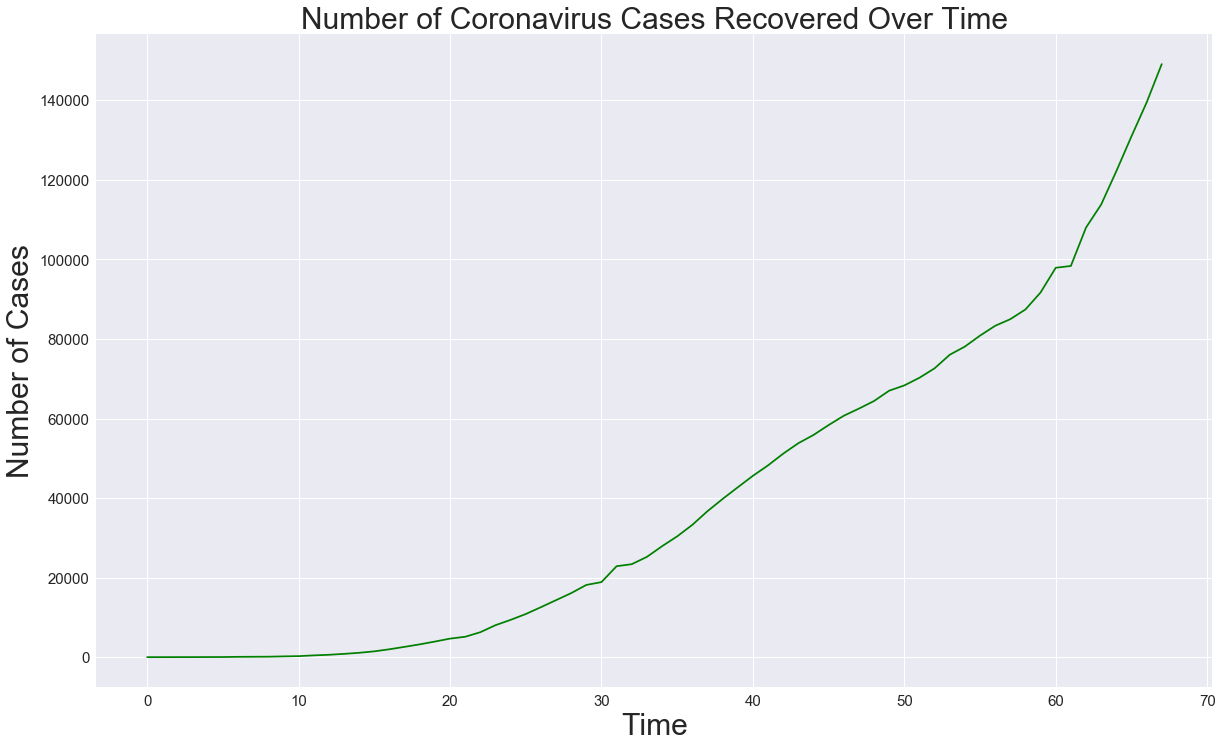

In [164]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

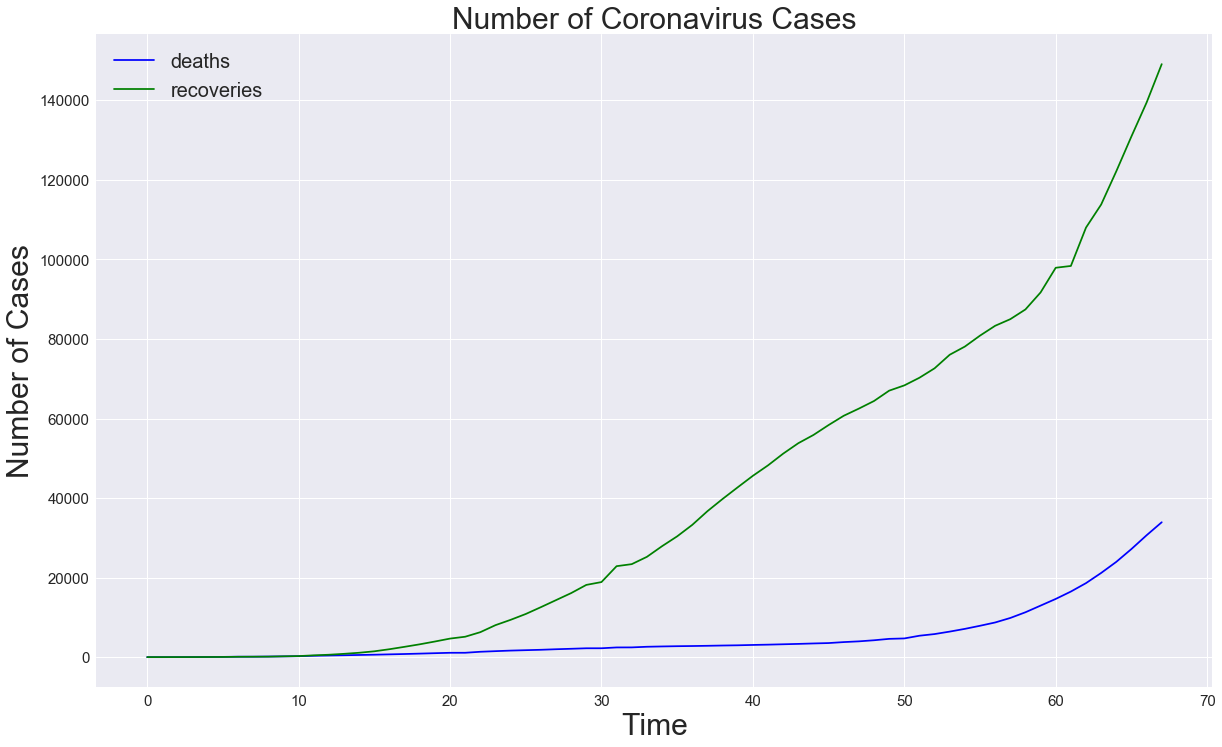

In [165]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='blue')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['deaths', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

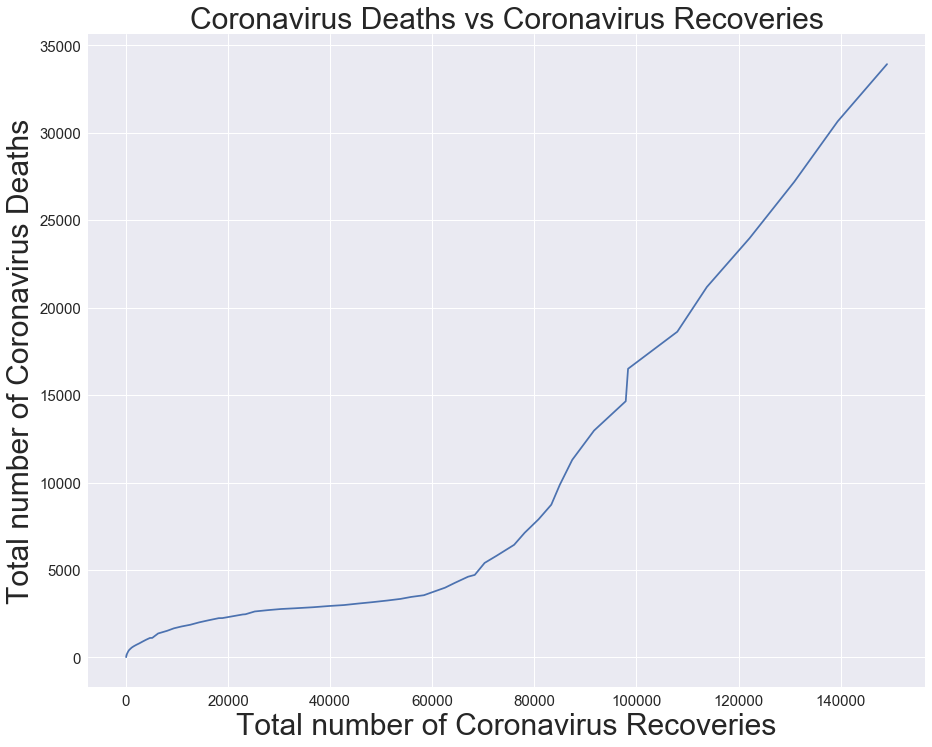

In [166]:
plt.figure(figsize=(15, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Coronavirus Deaths vs Coronavirus Recoveries', size=30)
plt.xlabel('Total number of Coronavirus Recoveries', size=30)
plt.ylabel('Total number of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()